## Last Name: Khokhar
## First Name: Hamza

# CSCI 4580/5580 - Data Science – Fall 2020
## Assignment 1: Exploratory Data Analysis and Statistics

#### **Name**: Hamza Khokhar

#### **Student ID**: 109644074

### Deliverables
Complete the all the exercises below and turn in a write up in the form of an Jupyuter notebook, that is, **an .ipynb file**.
The write up should include your code, answers to exercise questions, and plots of results.
The submission will be as an assignment on Canvas with this file (after your edits) as an attachment. 

You have to use this notebook and fill in answers inline.
Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

Please do not add or remove any cells (you can add cells while doing the homework but remove them before submission).

### Need Help? 
In case you need help with this assignment, please ask your questions on the designated channel for Assignment 1 on Microsoft Teams. This way, you may receive assistance from the TA’s or your classmates (<b>DO NOT share your solution</b>) [Recommended]. 
<br/>If you need to include your solution in your question, please create a new chat with <b>all the TA’s</b> (in the new chat, add all the TA’s rather than sending your question to the TA’s separately).


### Collaboration
This assignment is to be done individually. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

# Overview
Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

The dataset for this assignment is available on Canvas under Assignment 1

Its a dataset containing various attributes of Abalone specimens, in particular the number of "rings" (last column) that shows the approximate age of the specimen. The dataset is typically used to predict number of rings from other attributes.

The data directory contains these files:

* **abalone.data**, A csv file with data on a number of abalone specimens.
* **abalone.names**, A text file with background information on the dataset.

## Part 1: Reading

#### Q1 [5 Points]

Step 1 is to read the dataset. First download it from the link above, and save it into a data directory such as the path in the cell below. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender). 

In [5]:
import csv

# TODO Load data files here...
def loaddatafile(fname):
    with open("abalone.data") as csvfile:
        data = list(csv.reader(csvfile))
    
    return data

'abalone_raw' should be a list of records, and each record should be a list of strings

In [6]:
abalone_raw = loaddatafile("abalone.data")
print(abalone_raw[0])

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


#### Q2 [15 Points]
Now construct the variable 'abalone' which is list of list of numbers from it by parsing the numeric strings to float values. For the first column, map the string values to numeric ones. 
Create a dictionary 'sex_to_number' and inverse dictionary 'number_to_sex' to map between the string values and numeric values. 

In [7]:
# convert the string table to a numeric one, and return the dictionaries
def raw_to_data(data):
    sex_to_numbers = { "M": 0, "F": 1, "I": 2}
    numbers_to_sex = { 0: "M", 1: "F", 2: "I"}
    numeric = []
    
    for row in data:
        first_element = row[0]
        if first_element == 'M':
            row[0] = 0
        elif first_element == 'F':
            row[0] = 1
        elif first_element == 'I':
            row[0] = 2
        
        for index, item in enumerate(row):
            if index == 0:
                continue 
            row[index] = float(item)
        
    numeric = data
        
    return numeric, sex_to_numbers, numbers_to_sex

In [8]:
abalone, sex_to_numbers, numbers_to_sex = raw_to_data(abalone_raw)
print (f'sex to numbers: {sex_to_numbers}')
print (f'numbers to sex: {numbers_to_sex}')
print (f'the first row of the numerical data: {abalone[0]}')
print (f'the first row length: {len(abalone[0])}')

sex to numbers: {'M': 0, 'F': 1, 'I': 2}
numbers to sex: {0: 'M', 1: 'F', 2: 'I'}
the first row of the numerical data: [0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0]
the first row length: 9


## Part 2: Basic Statistics

#### Q3 [5 Points]
Create a list of the column names for this dataset from the Dataset description. Preserve the case and the spaces in these names:

In [9]:
col_names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
print(col_names)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


#### Q4 [5 Points]
Now create a dictionary 'name_to_index' mapping column name to column.

In [10]:
name_to_index = {'Sex':0,'Length':1,'Diameter':2,'Height':3,'Whole weight':4,'Shucked weight':5,'Viscera weight':6,'Shell weight':7,'Rings':8}
print(name_to_index)

{'Sex': 0, 'Length': 1, 'Diameter': 2, 'Height': 3, 'Whole weight': 4, 'Shucked weight': 5, 'Viscera weight': 6, 'Shell weight': 7, 'Rings': 8}


#### Q5 [10 Points]
Use name_to_index to define a "get_column" function which returns a named column from the abalone table.

In [11]:
def get_column(name):
    data = []
    for row in abalone:
         data.append(row[name_to_index[name]])
    return data

In [12]:
print(get_column('Height'))

[0.095, 0.09, 0.135, 0.125, 0.08, 0.095, 0.15, 0.125, 0.125, 0.15, 0.14, 0.11, 0.135, 0.145, 0.1, 0.13, 0.085, 0.1, 0.08, 0.1, 0.095, 0.1, 0.155, 0.135, 0.165, 0.14, 0.185, 0.14, 0.18, 0.14, 0.165, 0.165, 0.165, 0.175, 0.2, 0.105, 0.155, 0.105, 0.135, 0.09, 0.105, 0.135, 0.045, 0.055, 0.05, 0.095, 0.12, 0.12, 0.07, 0.16, 0.12, 0.095, 0.13, 0.12, 0.1, 0.14, 0.12, 0.135, 0.06, 0.125, 0.105, 0.11, 0.13, 0.095, 0.12, 0.12, 0.16, 0.185, 0.12, 0.07, 0.13, 0.11, 0.17, 0.175, 0.195, 0.15, 0.14, 0.15, 0.14, 0.17, 0.14, 0.175, 0.165, 0.16, 0.14, 0.18, 0.14, 0.16, 0.13, 0.16, 0.135, 0.15, 0.175, 0.165, 0.19, 0.195, 0.15, 0.13, 0.13, 0.125, 0.095, 0.145, 0.16, 0.14, 0.16, 0.155, 0.165, 0.125, 0.135, 0.105, 0.125, 0.105, 0.08, 0.105, 0.125, 0.115, 0.135, 0.105, 0.15, 0.085, 0.105, 0.085, 0.14, 0.075, 0.08, 0.06, 0.09, 0.085, 0.16, 0.165, 0.165, 0.125, 0.09, 0.095, 0.065, 0.115, 0.08, 0.09, 0.11, 0.095, 0.155, 0.145, 0.19, 0.155, 0.13, 0.125, 0.12, 0.08, 0.055, 0.095, 0.145, 0.185, 0.19, 0.16, 0.135

#### Q6 [10 Points]
use numpy to compute the min, max, average and std deviation of the Height column.

In [13]:
import numpy as np
heights = get_column('Height')
height_stats = []
height_stats.append(np.min(heights))
height_stats.append(np.max(heights))
height_stats.append(np.mean(heights))
height_stats.append(np.std(heights))
print(f'min: {height_stats[0]}')
print(f'max: {height_stats[1]}')
print(f'average: {height_stats[2]}')
print(f'std: {height_stats[3]}')

min: 0.0
max: 1.13
average: 0.13951639932966242
std: 0.04182204947769995


#### Q7 [15 Points]
Now create a 9x5 pandas dataframe. Each row of the table should be a column name followed by the values of min, max, mean, and std for that column.

In [14]:
import pandas as pd


# calculatine min
def minn(input):
    minimum = []
    for name in col_names:
        colum = get_column(name)
        minimum.append(np.min(colum))
    return minimum


# calculating max
def maxx(input):
    maximum = []
    for name in col_names:
        colum = get_column(name)
        maximum.append(np.max(colum))
    return maximum


#calculating mean
def mean(input):
    mean1 = []
    for name in col_names:
        colum = get_column(name)
        mean1.append(np.mean(colum))
    return mean1


# calculating STD
def std(input):
    std1 = []
    for name in col_names:
        colum = get_column(name)
        std1.append(np.std(colum))
    return std1



data = {'Column Name': col_names, 'Min': minn(col_names), 'Max': maxx(col_names), 'Mean': mean(col_names), 'STD':std(col_names)}
summaries = pd.DataFrame(data)



print(summaries)

      Column Name     Min      Max      Mean       STD
0             Sex  0.0000   2.0000  0.955470  0.827716
1          Length  0.0750   0.8150  0.523992  0.120079
2        Diameter  0.0550   0.6500  0.407881  0.099228
3          Height  0.0000   1.1300  0.139516  0.041822
4    Whole weight  0.0020   2.8255  0.828742  0.490330
5  Shucked weight  0.0010   1.4880  0.359367  0.221936
6  Viscera weight  0.0005   0.7600  0.180594  0.109601
7    Shell weight  0.0015   1.0050  0.238831  0.139186
8           Rings  1.0000  29.0000  9.933684  3.223783


## Part 3: Histograms

#### Q8 [15 Points]
Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use matplotlib.pyplot and its 'subplots' function. Include the column name as a title above each subfigure. You must use loops rather than enumerating all 9 column names.

0
1
2
3
4
5
6
7
8


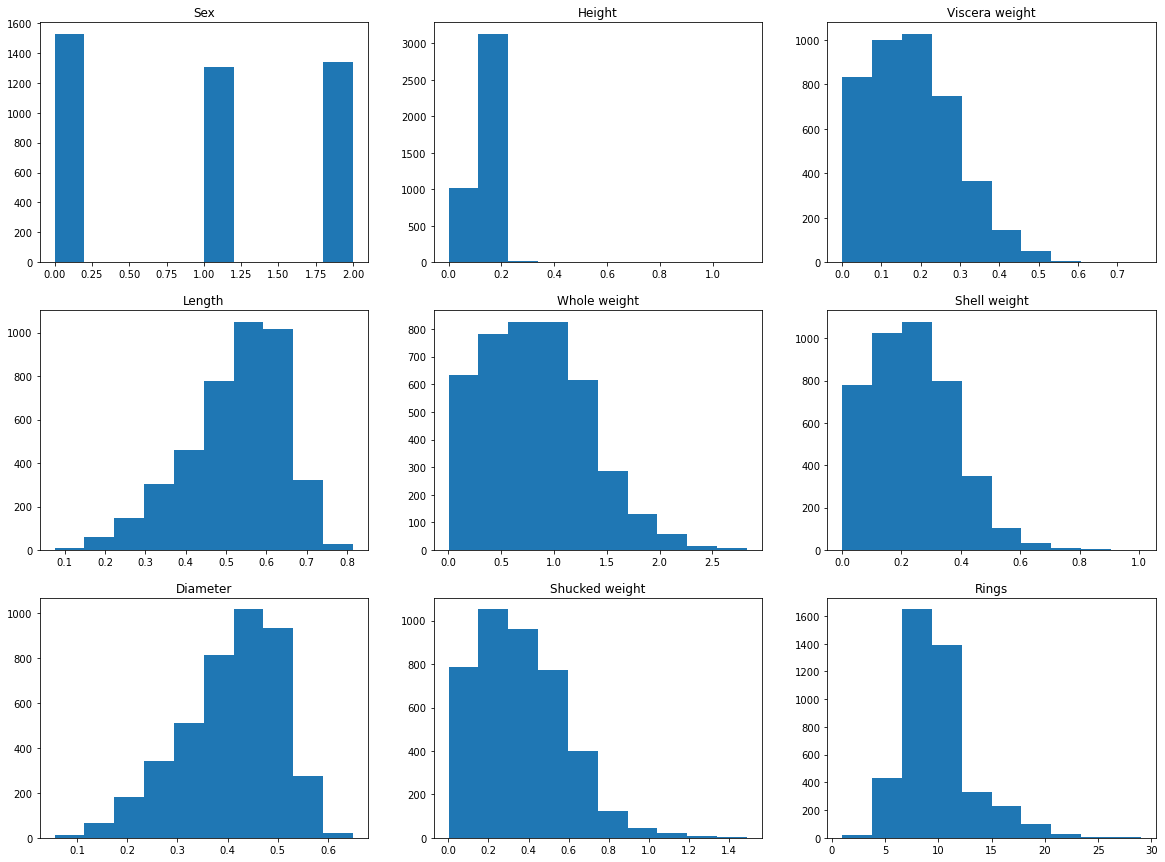

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3,figsize = (20,15))

for name in col_names:
    column = get_column(name)
    position = name_to_index[name]
    print(position)
    x = position % 3
    y = position // 3
    ax[x,y].hist(column)
    ax[x,y].set_title(name)
#plt.show()

## Part 4: Scatter plots

#### Q9 [15 Points]
Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot.

Add regression lines to the scatter plots.

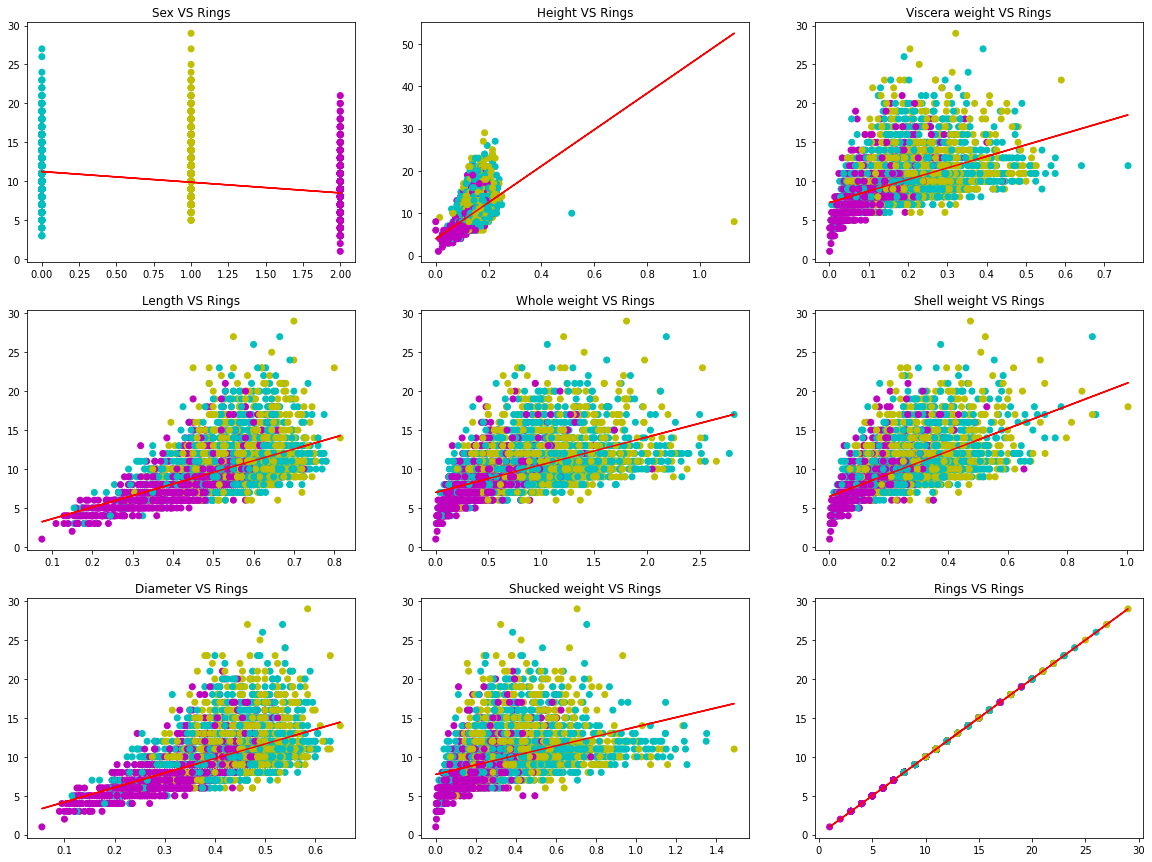

In [16]:
rings = get_column("Rings")
sex = get_column("Sex")
# TODO create the 3x3 grid of scatter plots
fig, ax = plt.subplots(3, 3,figsize = (20,15))
#adding the colors
colors = np.array(['c','y','m'])
for name in col_names:
    column = get_column(name)
    position = name_to_index[name]
    x = position % 3
    y = position // 3
    ax[x,y].scatter(column, rings, c=colors[sex])
    
    #adding the regrrssion line
    m, b = np.polyfit(column, rings, 1)
    ax[x,y].plot(column, m*np.array(column,dtype = float) + b, '-', color='red')
    
    #setting the plot titles
    ax[x,y].set_title(name + " VS Rings")
plt.show()

#### Q10 [5 Points]
Do you notice any issues with the dataset? e.g. outliers?

Yes if we look at the Height VS Rings scatter plot we can definately see some outliers. And in the other scatter plots there are also some outliers at the top of the plots.

# Submission

Please submit this notebook on Canvas under Assignment 1.